# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [2]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [5]:
res = requests.get(url)

In [6]:
vacancies = res.json()
vnum=vacancies.get('pages')
vnum

13

Получим ID всех вакансий:

In [7]:
all_vacancies_id=[]
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancies_id.extend(vacancy_ids)

  0%|          | 0/13 [00:00<?, ?it/s]

In [7]:
len(all_vacancies_id)

1200

#### Выгрузим все вакансии

In [8]:
vacs=[]
for vac_id in tqdm(all_vacancies_id):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/1300 [00:00<?, ?it/s]

In [180]:
df = pd.DataFrame(pd.json_normalize(vacs))


### Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [182]:
skills = df[['id','published_at','description','name', 'key_skills']]

In [190]:
#skills.assign(link = lambda x:(f'https://api.hh.ru/vacancies/' + x['id']))

In [191]:
#skills.drop('key_skill_string', axis=1, inplace=True)

In [195]:
def hz(cell):
    s = ','.join(str(v) for v in cell)
    d = s.replace('\'','').replace('{','').replace('}','').replace('name:','')
    return d.split(',')
skills['key_skill_string'] = skills.apply(lambda x:(hz(x['key_skills'])), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [197]:
skills.head(3)

,id,published_at,description,name,key_skills,key_skill_string
0,66554589,2022-06-29T11:45:01+0300,<p>Приглашаем Frontend разработчика в нашу ком...,Frontend разработчик (СберЧат),"[{'name': 'React'}, {'name': 'JavaScript'}, {'...","[ React, JavaScript, TypeScript, Node.js]"
1,67235538,2022-06-27T10:56:20+0300,<p>Ищем сильного дизайнера UX/UI с опытом рабо...,Продуктовый дизайнер,"[{'name': 'Figma'}, {'name': 'Работа в команде...","[ Figma, Работа в команде, UX, Adobe Photos..."
2,67406605,2022-07-01T13:48:18+0300,<p><strong>SberDevices</strong> - новое направ...,Data Analyst SberDevices,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...","[ Python, SQL, Анализ данных, ML, pandas, ..."


### Переведите даты публикаций в datetime

In [198]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1300 non-null   object
 1   published_at      1300 non-null   object
 2   description       1300 non-null   object
 3   name              1300 non-null   object
 4   key_skills        1300 non-null   object
 5   key_skill_string  1300 non-null   object
dtypes: object(6)
memory usage: 61.1+ KB


In [199]:
skills['published_at'] = skills['published_at'].astype('datetime64[ns]')
skills['published'] = skills['published_at'].dt.strftime('%Y-%m-%d')
#new_vacancy['created_date'] = new_vacancy['published_at'].dt.strftime('%Y-%m-%d')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1300 non-null   object        
 1   published_at      1300 non-null   datetime64[ns]
 2   description       1300 non-null   object        
 3   name              1300 non-null   object        
 4   key_skills        1300 non-null   object        
 5   key_skill_string  1300 non-null   object        
 6   published         1300 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 71.2+ KB


### Постройте график опубликованных вакансий по датам

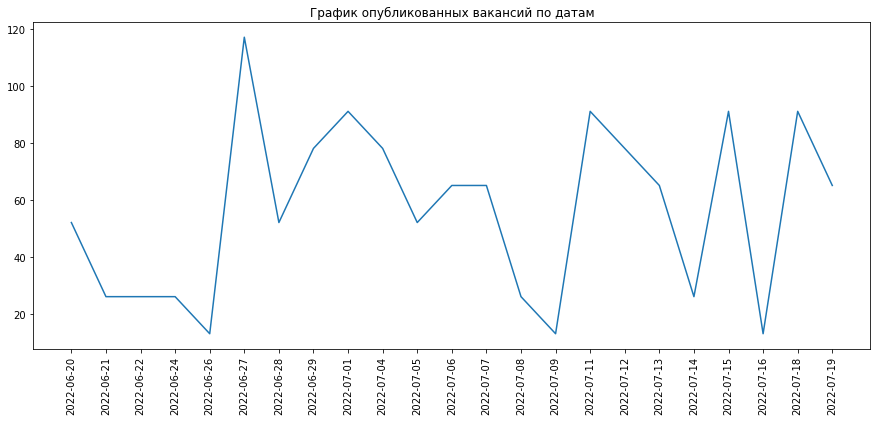

In [201]:
for_gr = skills.groupby('published').count()['id']
plt.figure(figsize=(15, 6))
plt.plot(for_gr)
plt.xticks(rotation = 90)
plt.title('График опубликованных вакансий по датам')
plt.show()

### Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [202]:
skills['published_day_of_week'] =  skills['published_at'].dt.day_name()
skills.groupby('published_day_of_week').count()['id'].nlargest(1) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


published_day_of_week
Monday    429
Name: id, dtype: int64

### Найдите те вакансии с использованием python, которые вам интересны

In [204]:
cond1 = skills.description.str.match('.*python.*', case=False)
cond2 = skills.name.str.match('.*data.*', case=False)
cond3 = skills.name.str.match('.*anal.*', case=False)
cond4 = skills.name.str.match('.*аналит.*', case=False)
cond5 = skills.name.str.match('.*данн.*', case=False)
df_da = skills[(cond2&cond3) | (cond4&cond5)] #фрейм аналитиков данных
df_like = skills[cond1&(cond2|cond3)] # фрейм с вакансиями, которые интересны
df_like.name

2                    Data Analyst SberDevices
14      Data Engineer (Core Banking Products)
29                              Data аналитик
50                             Data Scientist
52             ETL разработчик/ Data engineer
                        ...                  
1250                           Data Scientist
1252           ETL разработчик/ Data engineer
1253                     Стажер Data engineer
1285                     Junior Data Engineer
1287       Аналитик данных (campaign analyst)
Name: name, Length: 104, dtype: object

In [207]:
def skills(obj, n): # n - число, меньше которого навыки не показывать
    l = []
    for skills in obj.key_skills:
        for skill in skills:
            l.append(skill.get('name'))
    skills_for_gr = pd.Series(l).value_counts()
    return skills_for_gr[skills_for_gr>n]

skills(df_like, 13)

Python    52
SQL       39
Hadoop    26
Spark     26
dtype: int64

### Постройте график наиболее востребованных навыков для аналитика данных

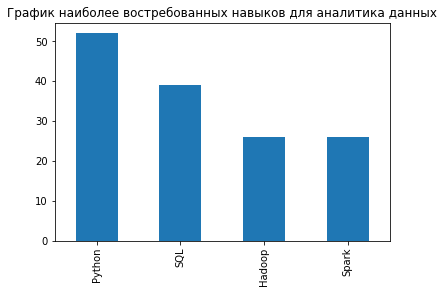

In [208]:
sk = skills(df_like, 13)
sk.plot.bar()
plt.title('График наиболее востребованных навыков для аналитика данных')
plt.show()